<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Для обеспечения безопасности данных клиентов страховой компании необходимо разработать метод шифрования, который обеспечит сложность восстановления персональной информации. Предложенный метод должен быть обоснован по своей корректности и эффективности.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

**Инструкция по выполнению проекта**
1. Загрузите и изучите данные.
2. Ответьте на вопрос и обоснуйте решение: 
Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)<br>
    a. Изменится. Приведите примеры матриц.<br>
    b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.<br>
3. Предложите алгоритм преобразования данных для решения задачи. Обоснуйте, почему качество линейной регрессии не поменяется.
4. Запрограммируйте этот алгоритм, применив матричные операции. Проверьте, что качество линейной регрессии из sklearn не отличается до и после преобразования. Примените метрику R2.

**Описание данных**
* Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.
* Целевой признак: количество страховых выплат клиенту за последние 5 лет.

## Загрузка данных

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/datasets/insurance.csv')

In [3]:
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
df.duplicated().sum()

153

In [6]:
df = df.drop_duplicates().reset_index(drop=True) 

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000
mean,0.498453,31.023932,39895.811842,1.203425,0.152259
std,0.500049,8.487995,9972.953985,1.098664,0.468934
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33200.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


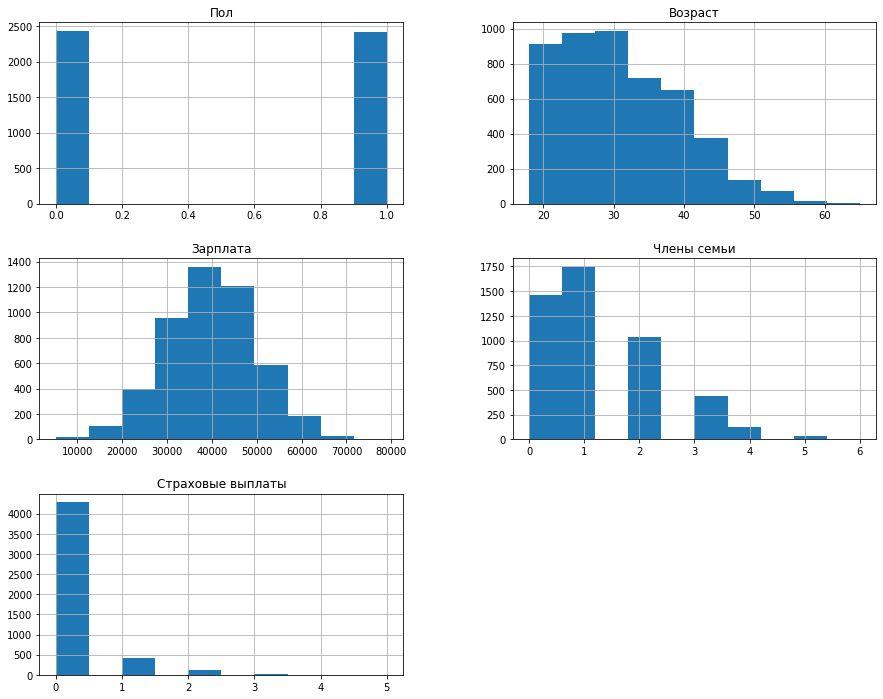

In [9]:
df.hist(figsize=(15, 12));

**Вывод**: имеются исторические данные о страховых выплатах за последние 5 лет в объеме 4847 строк. Пропусков нет, от дубликатов мы избавились, выбросов не наблюдается.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Изменится ли качество линейной регрессии при умножении матрицы признаков на обратимую матрицу?**

**Ответ:** При умножении на обратимую матрицу качество линейной регрессии не изменится.

**Обоснование:**
Умножим матрицу признаков X на некую обратимую матрицу P и подставим полученное уравнение в формулу предсказаний (т.к. качество регрессии не изменится, если не изменятся предсказания).

$$
a' = XPw'
$$

$$
w' = ((XP)^T (XP))^{-1} (XP)^T y
$$

$$
a' = XP ((XP)^T (XP))^{-1} (XP)^T y
$$

Расскроем внутреннюю скобку по свойству транспонированной матрицы:

$$
(AB)^T = B^T A^T
$$

$$
a' = XP (P^T X^T X P)^{-1} (XP)^T y
$$

Далее раскрываем, используя свойство обратной матрциы:

$$
(AB)^{-1}=B^{-1}A^{-1}
$$

$$
a' = XP ((X^T X) P)^{-1} (P^T)^{-1} (XP)^T y
$$

$$
a' = XP P^{-1} (X^T X)^{-1} (P^T)^{-1} (XP)^T y
$$

$$
a' = X (P P^{-1}) (X^T X)^{-1} ((P^T)^{-1} P^T) X^T y
$$

$$
a' = X (X^T X)^{-1} X^T y
$$

Напоминаем, что первоначальные формулы прдесказаний и обучения выглядят так:

$$
a = Xw
$$
$$
w = (X^T X)^{-1} X^T y
$$

А значит, при умножении на обратимую матрицу качество линейной регрессии не изменится:

$$
a' = a
$$
****
**Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.**

$$
w = (X^T X)^{-1} X^T y
$$

$$
w' = ((XP)^T (XP))^{-1} (XP)^T y 
$$

Расскроем скобки по свойству транспонированной матрицы:

$$
w' = (P^T X^T XP)^{-1} P^T X^T y
$$

$$
w' = ((P^T X^T X)P)^{-1} P^T X^T y
$$

Расскроем скобки по свойству обратной матрицы:

$$
w' = P^{-1} (P^T(X^T X))^{-1} P^T X^T y
$$

$$
w' = P^{-1} (X^T X)^{-1} ((P^T)^{-1} P^T) X^T y
$$

$$
w' = P^{-1} (X^T X)^{-1} X^T y
$$

Напомним, что формула параметров линейной регрессии в исходной задаче такова:

$$
w = (X^T X)^{-1} X^T y
$$

А значит, параметры линейной регрессии в исходной задаче и в преобразованной связаны следующим образом:

$$
w' = P^{-1} w 
$$

## Алгоритм преобразования

**Алгоритм**

1. Генерация случайной матрицы размером *(nxn)*, где *n* - количество признаков в матрице признаков.
2. Проверка сгенерированной матрицы на обратимость (того, что детерминант не равен нулю).
3. Умножение матрицы признаков на сгенерированную матрицу.
4. Обучение модели на преобразованных признаках.

**Обоснование**

Как было доказано выше, использование в качестве ключа шифрования обратимой матрицы не повлияет на качество линейной регрессии. При этом, не зная исходной матрицы (и обратимой к ней), восстановить изначальные данные будет затруднительно - умножение исходных данных на матрицу в криптографии относится к шифрованию методами аналитических преобразований и считается достаточно надежным. <br>

<div class="alert alert-success">
<b>Комментарий ревьюера №1</b> ✅
    
👍
</div>

## Проверка алгоритма

In [10]:
features = df.drop('Страховые выплаты', axis=1)
target = df['Страховые выплаты']

In [11]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=12345)

In [12]:
n = features.shape[1]

In [13]:
det = 0
while det == 0:
    key = np.random.normal(size=(n, n))
    det = np.linalg.det(key)

Для начала обучим модель на непреобразованных данным и вычислим метрику R2.

In [14]:
model = LinearRegression()
model.fit(features_train, target_train)
r2 = r2_score(target_test, model.predict(features_test))
print('R2 на непреобразованных данных:', r2)

R2 на непреобразованных данных: 0.42307727492147584


Теперь проведем преобразования, а затем снова обучим модель и посчитаем R2.

In [15]:
features_train_ciphered = features_train @ key

In [16]:
features_train_ciphered.head()

,0,1,2,3
4460,66611.976566,-56938.724173,24444.921155,109566.725762
3773,61951.714029,-52974.442453,22733.771347,101922.493796
4561,34207.156135,-29257.612861,12555.856028,56287.621902
1385,47381.315121,-40548.038701,17391.515672,77993.802658
724,39685.345789,-33965.525885,14569.686715,65329.404198


In [17]:
features_test_ciphered = features_test @ key

In [18]:
features_test_ciphered.head()

,0,1,2,3
1321,57696.624117,-49310.469915,21165.995941,94891.162385
3767,80554.550240,-68846.253162,29552.164984,132485.994208
166,41409.669288,-35426.100851,15200.973495,68146.096311
2935,23540.089281,-20179.196377,8650.645010,38789.678184
423,33558.411135,-28747.187964,12327.068612,55273.986271


In [19]:
model = LinearRegression()
model.fit(features_train_ciphered, target_train)
r2_cip = r2_score(target_test, model.predict(features_test_ciphered))
print('R2 на преобразованных данных:', r2_cip)

R2 на преобразованных данных: 0.42307727492135905


In [20]:
print(r2)
print(r2_cip)

0.42307727492147584
0.42307727492135905


Различия наблюдаются после более чем 10 знака после запятой, что скорее может быть связано с особенностями хранения дробных чисел в Python, чем с влиянием преобразования на результат.
****
Попробуем декодировать данные.

In [21]:
decipher_key = np.linalg.inv(key) 

In [22]:
features_train_ciphered.head()

,0,1,2,3
4460,66611.976566,-56938.724173,24444.921155,109566.725762
3773,61951.714029,-52974.442453,22733.771347,101922.493796
4561,34207.156135,-29257.612861,12555.856028,56287.621902
1385,47381.315121,-40548.038701,17391.515672,77993.802658
724,39685.345789,-33965.525885,14569.686715,65329.404198


In [35]:
features_train_deciphered = features_train_ciphered @ decipher_key

In [36]:
features_train_deciphered.head()

,0,1,2,3
4460,4.741680e-12,28.0,54500.0,2.000000e+00
3773,1.000000e+00,38.0,50700.0,1.000000e+00
4561,2.342198e-12,24.0,28000.0,1.000000e+00
1385,3.618148e-13,47.0,38800.0,-8.511119e-13
724,3.951490e-12,40.0,32500.0,1.000000e+00


<div class="alert alert-success">
<b>Комментарий ревьюера №2</b> ✅
    
Можно округлить значения с помощью `round()`, изменить названия столбцов и типы данных
</div>

In [25]:
features_train.head()

,Пол,Возраст,Зарплата,Члены семьи
4460,0,28.0,54500.0,2
3773,1,38.0,50700.0,1
4561,0,24.0,28000.0,1
1385,0,47.0,38800.0,0
724,0,40.0,32500.0,1


**Вывод:**<br>
В ходе работы предложен метод защиты персональных данных путем умножения матрицы признаков на случайно сгенерированную обратимую матрицу (известный в криптографии как один из методов аналитических преобразований). Было доказано, а затем и проверено на практике, что этот метод не влияет на качество модели линейной регрессии.<br>
Важно заметить, что зная ключ-матрицу, легко найти обратную ей и провести декодирование. Соответственно, ключ нельзя хранить в открытом доступе, а передавать возможно только по защищенным каналам.